<center><h1>Telco Churn Project</h1></center>

<a name ='toc'></a>
# Table of Contents 
1. [Project Summary](#project_summary)
    1. [Project Objectives](#project_objectives)
    2. [Business Goals](#business_goals)
    3. [Audience](#audience)
    4. [Deliverables](#deliverables)
    5. [Inital Hypotheses](#inital_hyp)
2. [Executive Summary](#exe_summ)
3. [Acquire Data](#acquire)
    1. [Data Dictonary](#data_dict)
    2. [Data Description](#data_desc)
    3. [Acquire Takeaways](#acquire_takeaways)
4. [Prepare Data](#prep_data)
    1. [Distributions](#distributions)
    2. [Prepare Takeaways](#prepare_takeaways)
5. [Data Exploration](#explore)
    1. [Correlations](#correlations)
    2. [Pairplot](#pairplot)
    3. [Explore Takeaways](#explore_takeaways)
6. [Statistical Testing](#stat_testing)
    1. [Hypothesis](#hypothesis)
    2. [Conclusion](#conclusion)
    3. [Takeaway](#stat_takeaway)
7. [Modeling & Evaluation](#modeling)
    1. [Baseline Accuracy](#baseline)
    2. [Minimum Viable Product Model](#mvp)
    3. [Feature Engineering](#feature_eng)
    4. [Hyperparameter Optimization](#hyp_opt)
    5. [Test Best Model](#test_best)
    6. [Create Predictions via CSV](#csv)
    7. [Conclusions & Next Steps](#conclusions)




<hr style="border-top: 10px groove tan; margin-top: 5px; margin-bottom: 5px"></hr>

<a name='project_summary'></a>
## Project Summary

<a name='project_objectives'></a>
### Project Objectives 
> - Create a Jupyter Notebook Report that shows processes and analysis with the goal of finding drivers for customer churn.
> - Within README.md file, include project description with goals, inital hypotheses, a data dictonary, project planning, instructions on how to recreate your project, answers to hypotheses, key findings, recommendations, and takeaways from the project.
> - CSV file with customer_id, probabilty of churn, and prediction of churn (1 = churn, 0 = not_churn). These predictions will be dervied from the best performing model on the test portion of the data. 
> - Any abstracted modules that are created to make the presentation more clean, during the acquistion and preparation of data.
> - Notebook walkthrough and presentation with a high-level overview of the entire project.

<a name='business_goals'></a>
### Business Goals 
> - Find drivers for customer churn at Telco. Why are customers churning?
> - Construct a machine-learning classification model that accurately predicts customer churn.
> - Document your process well enough to be presented or read like a report.

<a name='audience'></a>
### Audience 
> - Target audience is the Codeup Data Science Team.

<a name='deliverables'></a>
### Deliverables
> - A final report within Juypter Notebooks
> - A final report presentation using Juypter Notebooks
> - Modules necessary to recreate project


<a name='inital_hyp'></a>
### Inital Hypotheses


<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='exe_sum'></a>
## Executive Summary
> - I found that the Logistic Regression Modeling was consistently the most accurage at predicting churn using the features: _gender, senior_citizen, dependents, tenure, phone_service,online_security, online_backup, device_protection, paperless_billing, monthly_charges, total_charges, contract_type, internet_service_type, 'payment_type_
> - I found that most of the models weren't to different in their accuracy, even with hyperparameter optimization and feature engineering.
> - If I had more time to work on this project, I'd continue doing more feature engineering and hyperparameter optmization.

<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='acquire'></a>
## Acquire Data

In [1]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

# Visualizations
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns

# ML Modeling
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Custom Modules
from acquire import *
from prepare import *
from explore import *
from model import *


<a name='data_dict'></a>
### Data Dictionary

| Target                | Datatype               | Definition   |
|:----------------------|:-----------------------|:-------------|
| churn                 | 7043 non-null: object  |describes if the customer has churned|




| Feature               | Datatype               | Definition   |
|:----------------------|:-----------------------|:-------------|
| customer_id           | 7043 non-null: object  |unique customer identifier|
| gender                | 7043 non-null: object  |identifies customer gender|
| senior_citizen        | 7043 non-null: int64   |describes if customer is senior citizen|
| partner               | 7043 non-null: object  |describes if customer has a partner|
| dependents            | 7043 non-null: object  |describes if customer has dependents|
| tenure                | 7043 non-null: int64   |quantifies length of serivce from customer|
| phone_service         | 7043 non-null: object  |describes if customer has phone service|
| multiple_lines        | 7043 non-null: object  |describes if customer has multiple phone lines|
| online_security       | 7043 non-null: object  |describes if customer has online security|
| online_backup         | 7043 non-null: object  |describes if customer has online backup|
| device_protection     | 7043 non-null: object  |describes if customer has device protection|
| tech_support          | 7043 non-null: object  |describes if customer has tech support|
| streaming_tv          | 7043 non-null: object  |describes if customer has tv streaming|
| streaming_movies      | 7043 non-null: object  |describes if customer has movie streaming|
| paperless_billing     | 7043 non-null: object  |describes if customer uses paperless billing|
| monthly_charges       | 7043 non-null: float64 |quantifies average monthly charges|
| total_charges         | 7043 non-null: object  |quantifies all charges for customer|
| contract_type         | 7043 non-null: object  |describes customer contract type|
| internet_service_type | 7043 non-null: object  |describes customer internet service type|
| payment_type          | 7043 non-null: object  |describes customer service payment type|

In [2]:
# import telco_data from from CSV if it exists, otherwise import from mySQL
df = get_telco_data()
print(df.shape)

# These are the markdown format data_dicts that define the project
target_dict, feature_dict = fetch_data_dict(df)

(7043, 21)




<a name='data_desc'></a>
### Data Description

<style>
  table {margin-left: 0 !important;}
</style>
|                       |   count |        mean |         std |   min |    25% |     50% |     75% |     max |
|:----------------------|--------:|------------:|------------:|------:|-------:|--------:|--------:|--------:|
| gender                |    7043 |    0.504756 |    0.500013 |  0    |   0    |    1    |    1    |    1    |
| senior_citizen        |    7043 |    0.162147 |    0.368612 |  0    |   0    |    0    |    0    |    1    |
| partner               |    7043 |    0.483033 |    0.499748 |  0    |   0    |    0    |    1    |    1    |
| dependents            |    7043 |    0.299588 |    0.45811  |  0    |   0    |    0    |    1    |    1    |
| tenure                |    7043 |   32.3711   |   24.5595   |  0    |   9    |   29    |   55    |   72    |
| phone_service         |    7043 |    0.903166 |    0.295752 |  0    |   1    |    1    |    1    |    1    |
| multiple_lines        |    7043 |    0.615505 |    0.656039 |  0    |   0    |    1    |    1    |    2    |
| online_security       |    7043 |    0.720006 |    0.796885 |  0    |   0    |    1    |    1    |    2    |
| online_backup         |    7043 |    0.77822  |    0.778472 |  0    |   0    |    1    |    1    |    2    |
| device_protection     |    7043 |    0.777226 |    0.778826 |  0    |   0    |    1    |    1    |    2    |
| tech_support          |    7043 |    0.723555 |    0.795896 |  0    |   0    |    1    |    1    |    2    |
| streaming_tv          |    7043 |    0.817691 |    0.763212 |  0    |   0    |    1    |    1    |    2    |
| streaming_movies      |    7043 |    0.821241 |    0.761725 |  0    |   0    |    1    |    1    |    2    |
| paperless_billing     |    7043 |    0.592219 |    0.491457 |  0    |   0    |    1    |    1    |    1    |
| monthly_charges       |    7043 |   64.7617   |   30.09     | 18.25 |  35.5  |   70.35 |   89.85 |  118.75 |
| total_charges         |    7043 | 2279.73     | 2266.79     |  0    | 398.55 | 1394.55 | 3786.6  | 8684.8  |
| churn                 |    7043 |    0.26537  |    0.441561 |  0    |   0    |    0    |    1    |    1    |
| contract_type         |    7043 |    1.30953  |    0.833755 |  0    |   1    |    2    |    2    |    2    |
| internet_service_type |    7043 |    0.872923 |    0.737796 |  0    |   0    |    1    |    1    |    2    |
| payment_type          |    7043 |    1.66193  |    1.16332  |  0    |   1    |    2    |    3    |    3    |


In [3]:
customer_id_index, data_desc = format_data_description(df)

<a name='acquire_takeaways'></a>
### Acquire Takeaways
> - Wrote a SQL query to acquire telco from Codeup Database.
> - Using `acquire.py` we will create and cache the created CSV file if it doesn't exist, otherwise it will return the file.
> - There are 7043 rows and 21 columns within the inital data query.
> - The `customer_id`column doesn't offer any insight into customer churn, as each observation contains a unique id, so we will drop this column.

<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='prep_data'></a>
## Prepare Data


<a name='distributions'></a>
### Distributions
|||
|-|-|
|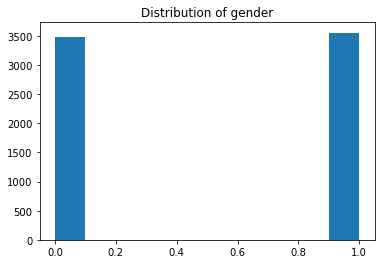|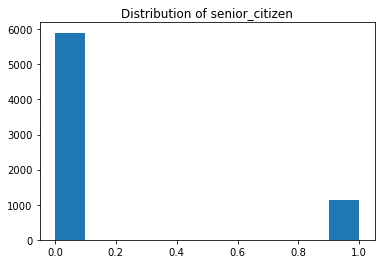|
|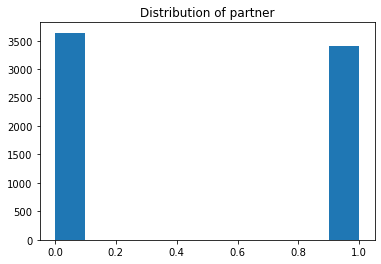|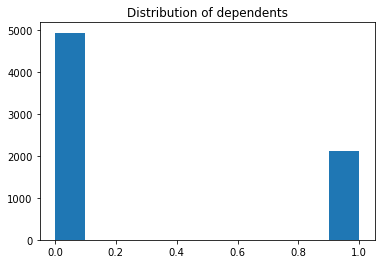|
|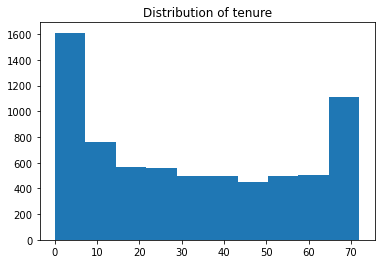|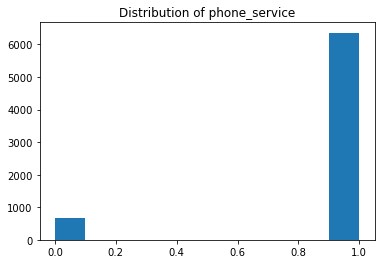|
|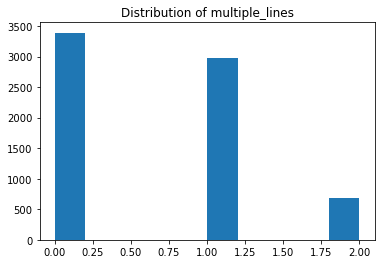|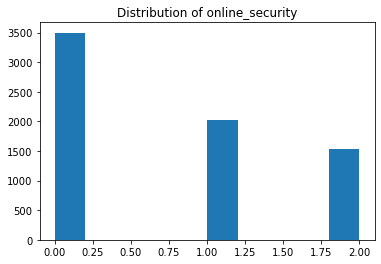|
|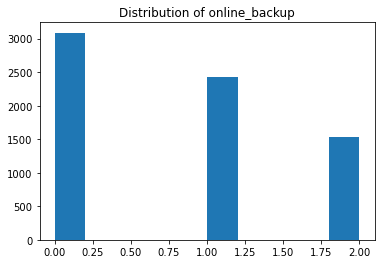|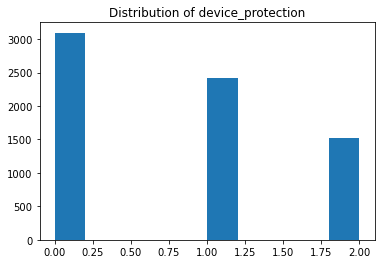|
|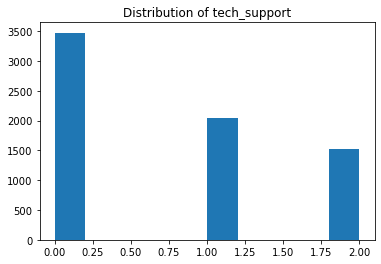|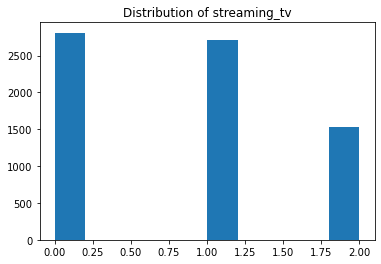|
|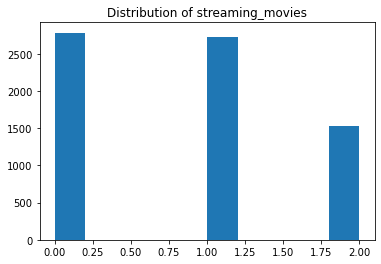|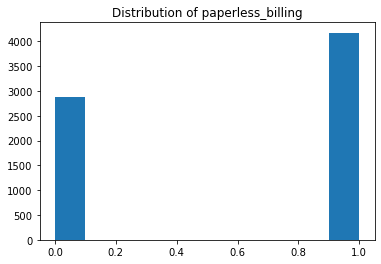|
|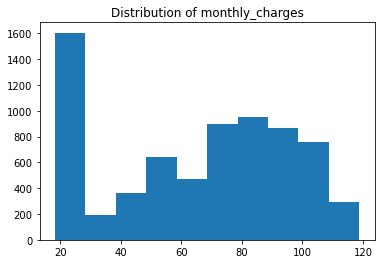|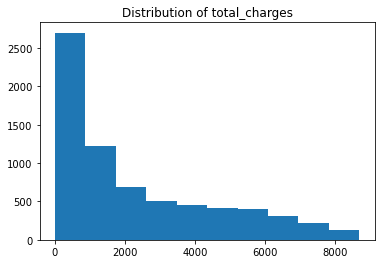|
|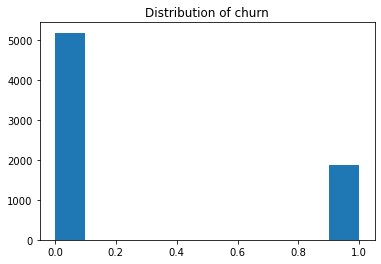|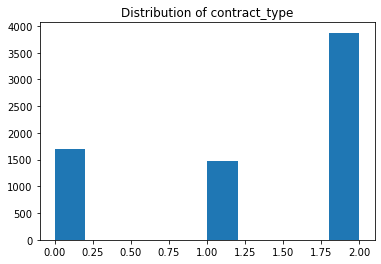|
|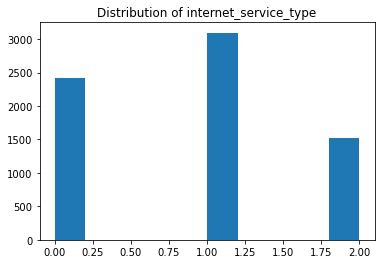|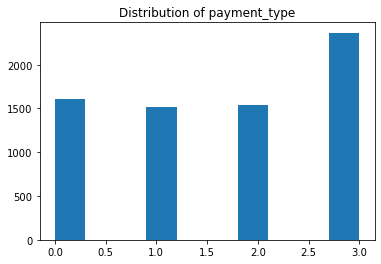|

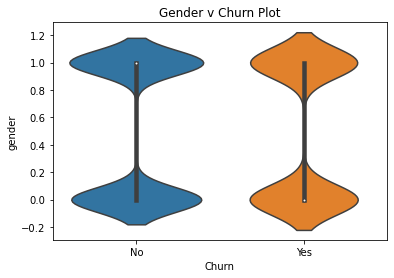

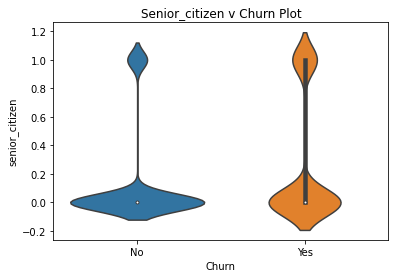

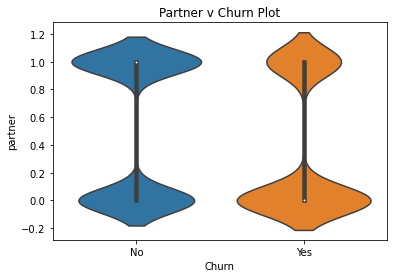

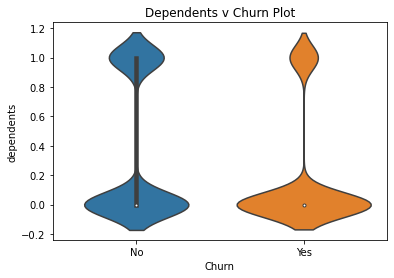

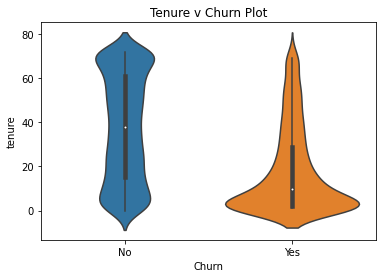

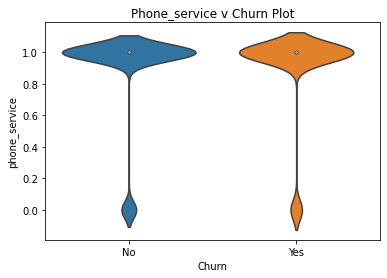

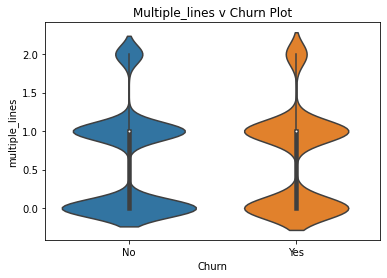

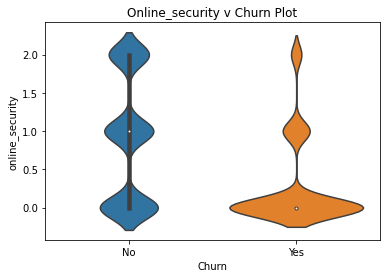

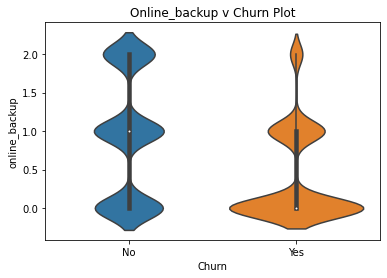

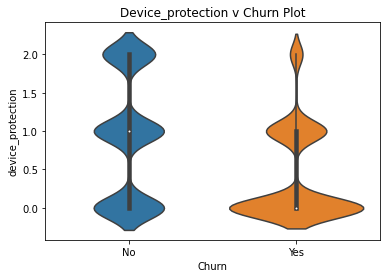

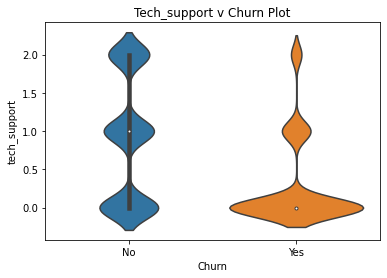

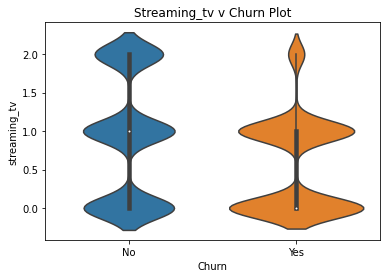

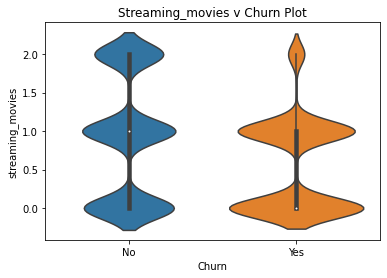

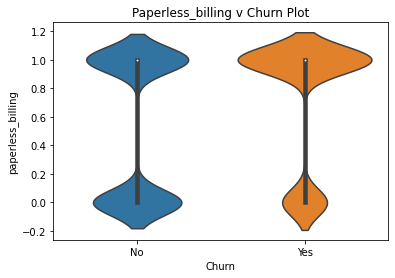

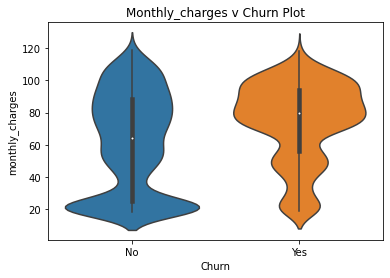

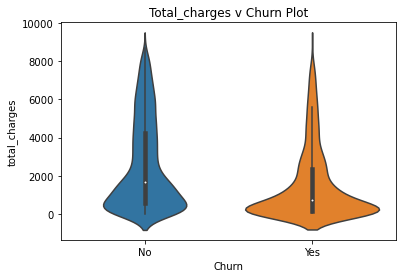

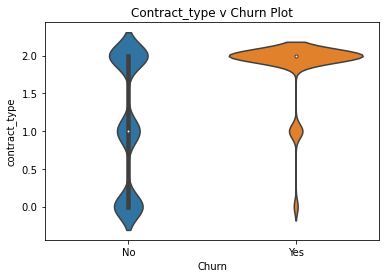

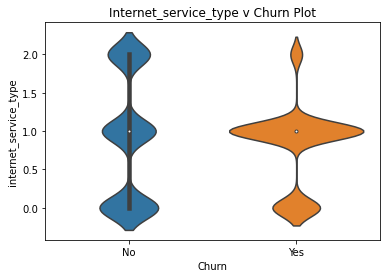

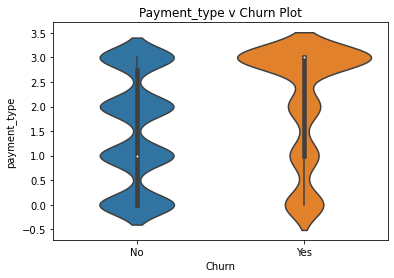

In [4]:
# # Show distributions for each column
# show_dists(df)

show_violinplots(df, 'churn')

<a name='prepare_takeaways'></a>
### Prepare Takeaways
> - The column `total_charges` was formatted as a string (object) and needed to be as a float 64, there were 11 values that were blank. However, upon further inspection we could see that these were the ones with 0 tenure, meaning they were new customers and hadn't incurred a monthly bill yet, so I put their values to be 0.
> - The distrubtion of `tenure` appears to be mostly uniformly distributed.
> - `total_charges` has a J-shaped distribution.
> - `monthly_charges` appears to have a biomodal distrubtion.
> - Those who `churn` compose about 25% of the data.
> - Data has been split into train, validate, and test datasets, stratifying my `churn` column.
> - I changed the values for all non-int based columns into 1's and 0's so they could be used within the ML modeling. Below is the replacement key:

```python
replacement_key = {
    'gender': {'Female': 0, 'Male': 1},
    'partner': {'Yes': 1, 'No': 0},
    'dependents': {'Yes': 1, 'No': 0},
    'phone_service': {'Yes': 1, 'No': 0},
    'multiple_lines': {'Yes': 1, 'No': 0, 'No phone service': 2},
    'online_security': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'online_backup': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'device_protection': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'tech_support': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'streaming_tv': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'streaming_movies': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'paperless_billing': {'Yes': 1, 'No': 0},
    'churn': {'Yes': 1, 'No': 0},
    'contract_type': {'Two year': 0, 'One year': 1, 'Month-to-month': 2},
    'internet_service_type': {'DSL': 0, 'Fiber optic': 1, 'None': 2},
    'payment_type': {'Mailed check': 0, 'Credit card (automatic)': 1,
                     'Bank transfer (automatic)': 2, 'Electronic check': 3}
```

                     
<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='explore'></a>
## Explore Data

<a name='correlations'></a>
### Correlations

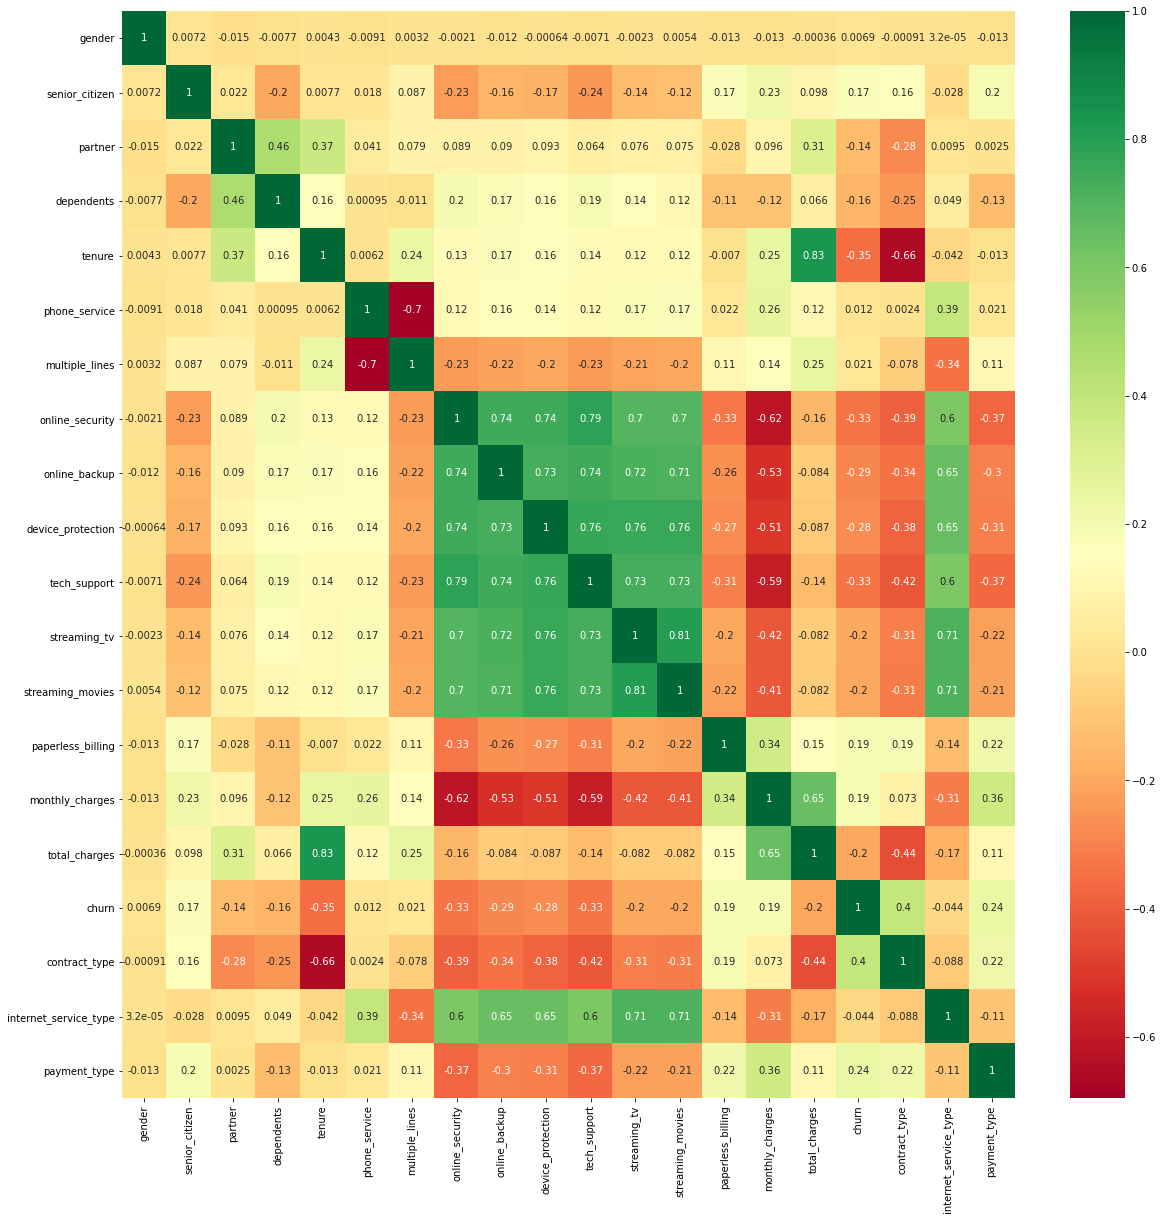

#### Correlations with Churn
|Column Name|       churn |
|:----------------------|------------:|
| tenure                | -0.352282   |
| online_security       | -0.334429   |
| tech_support          | -0.33423    |
| online_backup         | -0.286061   |
| device_protection     | -0.276515   |
| total_charges         | -0.201972   |
| streaming_movies      | -0.201724   |
| streaming_tv          | -0.195773   |
| dependents            | -0.160315   |
| partner               | -0.137696   |
| internet_service_type | -0.0438973  |
| gender                |  0.00688456 |
| phone_service         |  0.0119954  |
| multiple_lines        |  0.020509   |
| senior_citizen        |  0.165482   |
| paperless_billing     |  0.187409   |
| monthly_charges       |  0.18904    |
| payment_type          |  0.235395   |
| contract_type         |  0.396156   |
| churn                 |  1          |

In [5]:
train, validate, test = train_validate_test_split(df, 'churn')
test_df = test
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (3943, 20)
Validate: (1691, 20)
Test: (1409, 20)


In [6]:
# correlation = make_heatmap(train, 'churn')
# print(correlation.to_markdown())

<a name='pairplot'></a>
### Pair Plot
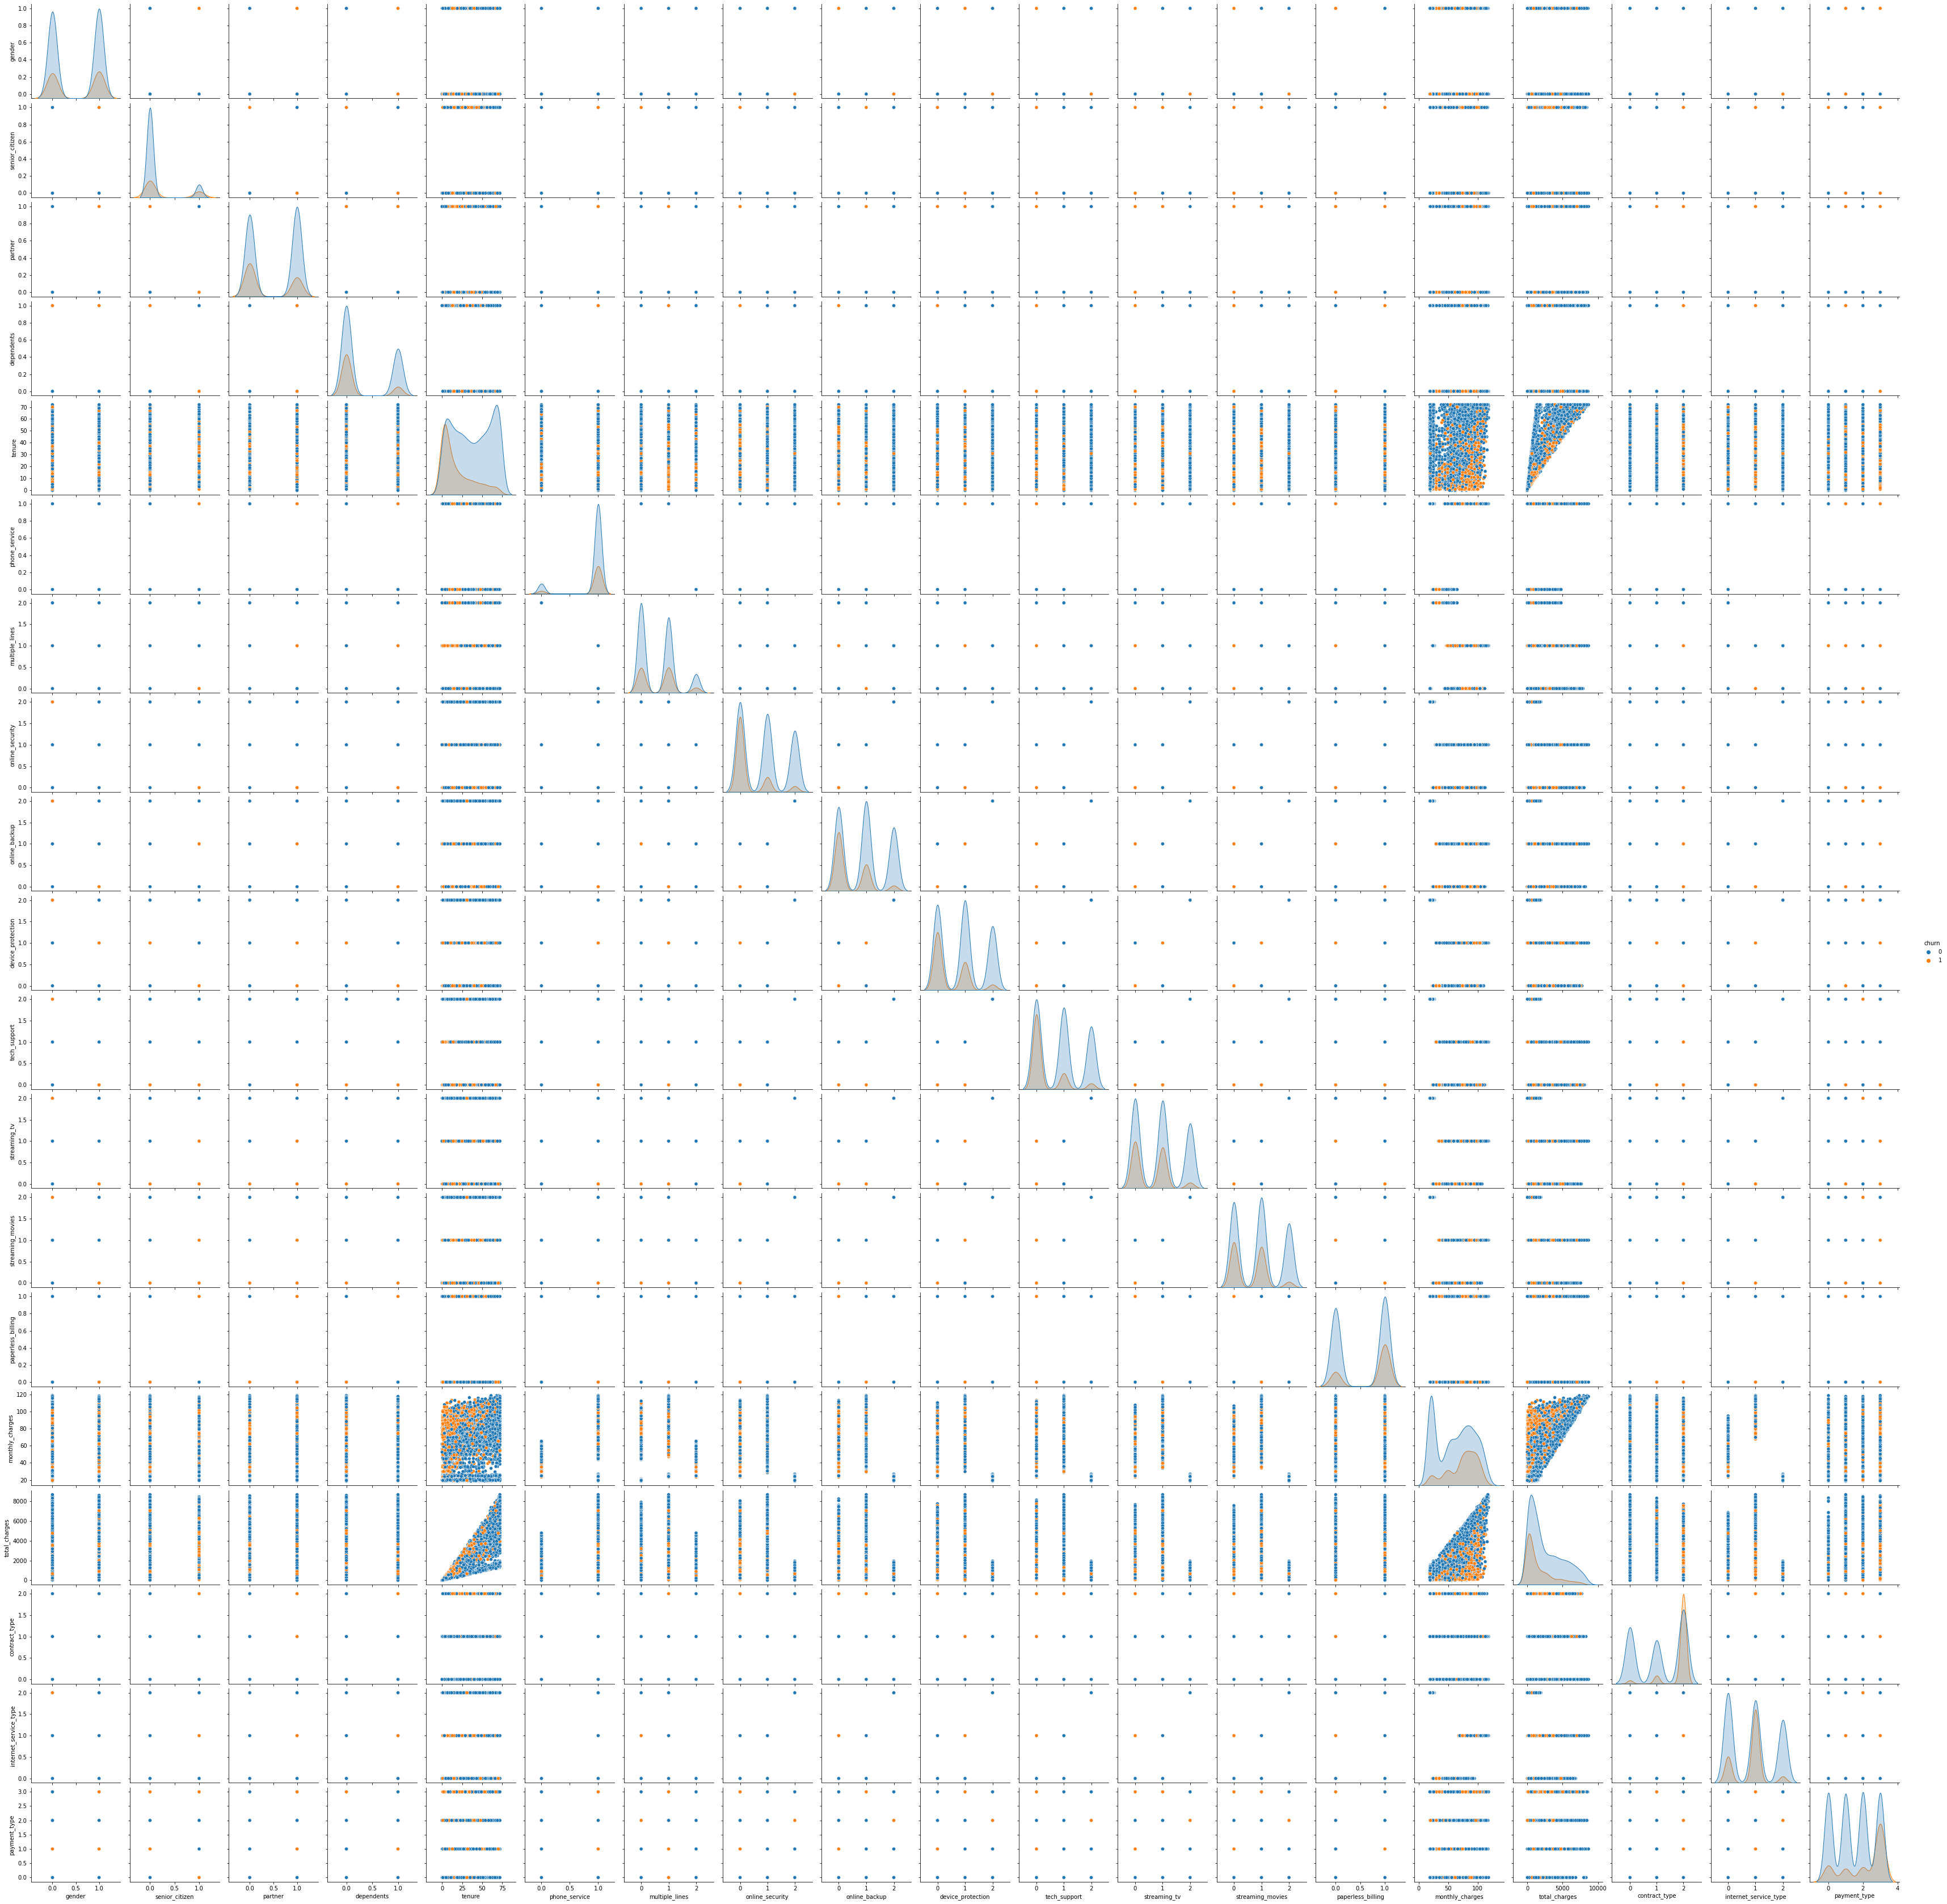

In [7]:
#### Takes a while to run, only run if you have too.
# sns.pairplot(train, hue='churn')
# plt.show()

<a name='explore_takeaways'></a>
### Explore Takeaways
> - Examining the correlation between `churn` and each column, we can see that `contract_type`, `tenure`, `online_security`, `tech_support`, `online_backup`, `device_protection`, `device_protection`, `payment_type` are the some of the most correlated columns. 
> - Feeding all columns into my models and seeing which one will be the most accurate seems the best course of action, particularly using combinatorics to determine the best performing model.

<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='stat_testing'></a>
## Statistical Testing

<a name='hypothesis'></a>
### Hypothesis
> - __alpha = .025__ (divide .05 by two since it is a single-tail)
> - ${H}_{o}$: `payment_type` of 'Electronic check' has a __lower or equal__ churn rate than other `payment_type`.
> - ${H}_{a}$: `payment_type` of 'Electronic check' has a __higher__ churn rate than other `payment_type`.

In [8]:
# Electronic payment type is 3 on the replacement_key
electronic_check = train[train.payment_type == 3]
all_other_payment_types = train[train.payment_type != 3]

print(f"Electronic Check std: {electronic_check.describe()['churn']['std']}")
print(f"All other payment types std: {all_other_payment_types.describe()['churn']['std']}")

Electronic Check std: 0.4977578555968512
All other payment types std: 0.3774006922392884


In [9]:
tstat, p = stats.ttest_ind(electronic_check.churn, 
                          all_other_payment_types.churn,
                          equal_var=False)
print(f't_stat: {tstat}')
print(f'p_value: {p}')

t_stat: 17.923036479619082
p_value: 5.768760841525854e-67


<a name='conclusion'></a>
### Conclusion
> - We reject the null hypothesis due to a p_value less than .025 and t_stat is 17.92, and can state the the `payment_type` of 'Electronic check' has a significantly higher `churn` than other `payment_types`

<a name='stat_takeaway'></a>
### Takeaway
> - `payment_type` will be a useful feature for modeling.

<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='modeling'></a>
## Modeling & Evaluation

<a name='baseline'></a>
### Baseline Accuracy
> - Baseline accuracy is 73%, so goal is to beat 73%.

In [10]:
# Create X & y version of train, validate, test where y is just the
# Series with the target variable and X is all of the features

X_train= train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

# Set baseline as 0, meaning that customer hasn't churned
train['baseline'] = 0

print(classification_report(y_train, train.baseline))
train.drop(columns=['baseline'], inplace=True)

train.head(1)

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2897
           1       0.00      0.00      0.00      1046

    accuracy                           0.73      3943
   macro avg       0.37      0.50      0.42      3943
weighted avg       0.54      0.73      0.62      3943



,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
5642,0,0,1,1,23,1,1,2,2,2,2,2,2,1,25.6,514.75,0,0,2,1


<a name='feature_eng'></a>
### Feature Engineering
> - After iterating though all 4 models using all combinations of features the most accurate without hyperparameter optimization are:
```python
most_accurate_comb = ('gender', 'senior_citizen', 'dependents', 'tenure', 'phone_service','online_security',
'online_backup', 'device_protection', 'paperless_billing', 'monthly_charges',
'total_charges', 'contract_type', 'internet_service_type', 'payment_type')
```

In [11]:

# # This will iterate through every feature combination and all 4 models to see which features
# # and models provide the most accurate results.
# # Inital results show that using RandomForestClassifer with this model is the most accurate
# most_accurate_comb, accuracy = most_accurate_attributes(X_train, X_validate, y_train, y_validate)

most_accurate_comb = (
    'gender', 'senior_citizen', 'dependents', 'tenure', 'phone_service','online_security',
    'online_backup', 'device_protection', 'paperless_billing', 'monthly_charges',
    'total_charges', 'contract_type', 'internet_service_type', 'payment_type')

<a name='mvp'></a>
### Minimum Viable Product Model
> - Utilizing Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbors with the above noted features due to feature engineering.
> - Goal is to beat baseline accuracy of 73%.
> - Function `most_accurate_attributes` tested all combinations of features with all 4 models to provide the most consistently accurate ones with the best model.

In [12]:
lr_model, dt_model, rf_model, kn_model = score_all_models(X_train[[*most_accurate_comb]], y_train,
                                                          X_validate[[*most_accurate_comb]], y_validate)



LogisticRegression(random_state=123)

train score: 
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2897
           1       0.63      0.56      0.60      1046

    accuracy                           0.80      3943
   macro avg       0.74      0.72      0.73      3943
weighted avg       0.79      0.80      0.79      3943

val score: 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1242
           1       0.62      0.54      0.58       449

    accuracy                           0.79      1691
   macro avg       0.73      0.71      0.72      1691
weighted avg       0.78      0.79      0.78      1691

________________________

DecisionTreeClassifier(max_depth=15, random_state=123)

train score: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2897
           1       0.93      0.94      0.94      1046

    accuracy          

<a name='hyp_opt'></a>
### Hyperparameter Optimization

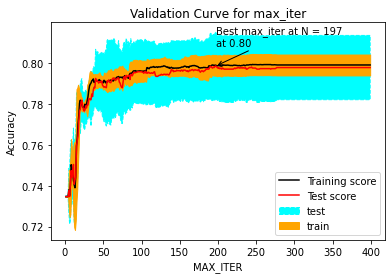

#### Train

|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.848606 | 0.882292 |   0.865121 | 2897       |
| 1            |    0.633727 | 0.564054 |   0.596864 | 1046       |
| accuracy     |    0.79787  | 0.79787  |   0.79787  |    0.79787 |
| macro avg    |    0.741166 | 0.723173 |   0.730992 | 3943       |
| weighted avg |    0.791603 | 0.79787  |   0.793958 | 3943       |


#### Validate

|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.840246 | 0.880837 |   0.860063 | 1242        |
| 1            |    0.619537 | 0.536748 |   0.575179 |  449        |
| accuracy     |    0.789474 | 0.789474 |   0.789474 |    0.789474 |
| macro avg    |    0.729892 | 0.708793 |   0.717621 | 1691        |
| weighted avg |    0.781643 | 0.789474 |   0.78442  | 1691        |


In [13]:

# Tests hyperparameters on which ones provide the most accurate results
# param_grid = {'max_iter': np.arange(1, 400)}

# ############################ Run this to establish the model with best hyperparameters #############################
# val = explore_validation_curve(X_train[[*most_accurate_comb]], y_train, param_grid, lr_model)
# val.fit(X_train[[*most_accurate_comb]], y_train)

# y_pred_train = val.predict(X_train[[*most_accurate_comb]])
# y_pred = val.predict(X_validate[[*most_accurate_comb]])

# print(pd.DataFrame(classification_report(y_true=y_train, y_pred=y_pred_train, output_dict=True)).T.to_markdown())
# print(pd.DataFrame(classification_report(y_true=y_validate, y_pred=y_pred, output_dict=True)).T.to_markdown())
############################ Run this to establish the model with best hyperparameters #############################




<a name='test_best'></a>
### Test Best Model
> - Only using the best performing model to test against the test dataset to maintain the highest accuracy.

In [14]:
actual_test = y_test
predicted_test = lr_model.predict(X_test[[*most_accurate_comb]])
print(classification_report(actual_test, predicted_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1035
           1       0.64      0.60      0.62       374

    accuracy                           0.80      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409



<a name='csv'></a>
### Create Predictions via CSV
> - Create a CSV file with probabilty of class, prediction of churn (1=churn, 0=not_churn)
> - These predictions are derived from the Logistic Regression model

In [16]:
predicted_df = pd.DataFrame(predicted_test).rename(columns={0:'predicted'})
proba_df = pd.DataFrame(lr_model.predict_proba(X_test[[*most_accurate_comb]])).rename(columns={1:'probability_of_churn'})
pred_and_prob = pd.concat([predicted_df, proba_df.probability_of_churn], axis=1)
reset_test = test_df.reset_index()
test_prob_df = pd.concat([reset_test, pred_and_prob], axis=1)
merged_df = test_prob_df.merge(customer_id_index, how='left', on='index')
csv_df = merged_df[['customer_id', 'probability_of_churn', 'predicted']]
csv_df.to_csv('predictions.csv')

<a name='conclusions'></a>
### Conclusions and Next Steps

> - I found that most of the models weren't to different in their accuracy, even with hyperparameter optimization and feature engineering.
> - If I had more time to work on this project, I'd continue doing more feature engineering and hyperparameter optmization. 

<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

In [ ]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>